# Regressão Linear

### Importando bibliotecas

In [2]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [3]:
#Definindo variáveis

idade = [18,25,57,45,26,64,37,40,24,33]
salarioAnual = [15000,29000,68000,52000,32000,80000,41000,45000,26000,33000]

In [4]:
#Criando arrays

xData = np.array(idade)
yData = np.array(salarioAnual)

In [8]:
#Define função a ser otimizada (regressão linear)
def equacaoLinear(x,a,b):
    return a*x + b

In [10]:
#Gera parâmetros iniciais para o otimizador
parametros = np.array([1.0,1.0])

In [12]:
#Realiza otimização através do erro médio quadrático (MSE)
param, pcov = curve_fit(equacaoLinear,xData,yData, parametros)
#param - contém os parâmetros de ajuste da curva
#pcov - contém a covariância dos parâmetros encontrados

In [16]:
#Realiza a previsão dos dados através do modelo (contrói a equação linear)
previsao = equacaoLinear(xData,*param)

In [17]:
#Encontra o erro absoluto (linhas verticais)
erroAbs = previsao - yData 

In [18]:
#Calcula o erro quadrático de cada medida

SE = np.square(erroAbs)

#Calcula MSE

MSE = np.mean(SE)
print("SE: {}".format(SE))
print("MSE: {}".format(MSE))

SE: [ 4587883.33064101  6834760.82563804   413069.18137435   634115.64144357
 18436761.23538558  4467167.3659006   1517955.21070226  1424802.59030848
   873982.13514337 15601891.57382987]
MSE: 5479238.909036714


In [21]:
#Mostra parâmetros da regressão

print("Y = {:.2f}X {:.2f}".format(param[0],param[1]))

Y = 1320.53X -6627.65


Text(0, 0.5, 'Salario Anual')

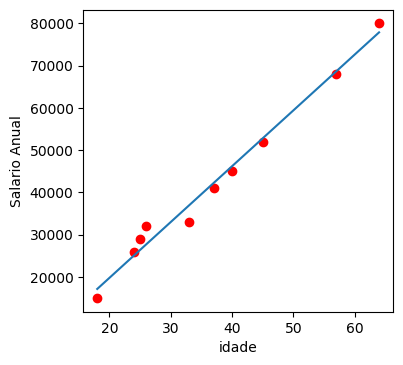

In [30]:
f = plt.figure(figsize = (4,4), dpi = 100)
axes = f.add_subplot(111)
axes.plot(xData,yData,'ro')
xModel = np.linspace(min(xData),max(xData))
yModel = equacaoLinear(xModel, *param)
plt.plot(xModel,yModel)

plt.xlabel("idade")
plt.ylabel("Salario Anual")

## Utilizando o Scikit Learn

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [33]:
reg = LinearRegression()

In [34]:
xModel = xData.reshape((-1,1)) #na regressão linear é necessário que o X seja 2D

In [35]:
#Treinando modelo

reg.fit(xModel,yData)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
previsao = reg.predict(xModel)

In [37]:
MSE = mean_squared_error(yData, previsao)

In [42]:
print("Y = {}X {}".format(reg.coef_,reg.intercept_))

from sklearn.metrics import r2_score
R2 = r2_score(yData,previsao)
print("Coeficiente de Determinação R2: {}".format(R2))

Y = [1320.53256496]X -6627.651646877624
Coeficiente de Determinação R2: 0.9846300347582353


## Utilizando um dataset real

In [45]:
import pandas as pd
#Realizando a leitura do banco de dados
df = pd.read_csv("headbrain.csv")

In [46]:
#Realiza a visualização das 5 primeiras linhas
df.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [50]:
#Como o format dos dados em cada um das colunas do dataframe são séries, é necessário converter em um array

x = df['Head Size(cm^3)'].values
y = df['Brain Weight(grams)'].values
x.shape

(237,)

In [52]:
#Realiza a construção do modelo de regressão

reg = LinearRegression()
x_Reshaped = x.reshape((-1,1))
x_Reshaped.shape

regressão = reg.fit(x_Reshaped,y)

In [53]:
previsao = reg.predict(x_Reshaped)

In [60]:
print("Y = {}X + {}".format(reg.coef_,reg.intercept_))

Y = [0.26342934]X + 325.5734210494428


In [61]:
from sklearn.metrics import r2_score

In [62]:
R2 = r2_score(y, previsao)
print("Coeficiente de Determinação R2: {}".format(R2))

Coeficiente de Determinação R2: 0.639311719957


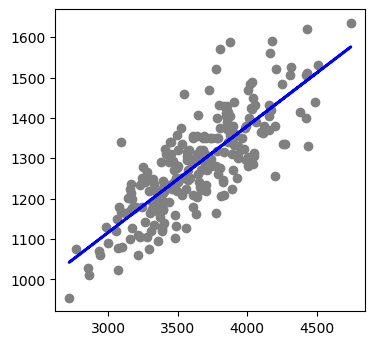

In [65]:
#Plotando nosso modelo

plt.figure(figsize = (4,4), dpi = 100)
plt.scatter(x,y,color = 'gray')
plt.plot(x,previsao, color = 'blue', linewidth = 2)